In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Portfolio theory is that some risk can be mitigated by mixing securities together, 
# which can allow investors to earn higher rate of return whilst reducing risk
# Some investors favour safer returns with the expense of less change of exceptional returns

In [3]:
# Load data, one year is approximate 252 days
stocks = 'AAPL GLD'. split()
df = pdr.get_data_yahoo(stocks, '2019-01-01')['Close']
df = df[-253:]

df_vol = pd.DataFrame()
for stock in stocks:
    if stock not in df_vol:
        df_vol[stock] = np.log(df[stock]).diff() 

In [4]:
df_vol.tail()

,AAPL,GLD
Date,,
2020-07-13,-0.004624,0.001240
2020-07-14,0.016413,0.004653
2020-07-15,0.006854,0.000881
2020-07-16,-0.012381,-0.009497
2020-07-17,-0.002022,0.008204


In [5]:
# Annualize variances, by multiplying daily variance by 252
var_aapl = df_vol['AAPL'].var() * 252
var_gld = df_vol['GLD'].var() * 252
print(var_aapl)
print(var_gld)

0.16580957382346276
0.028653813876512266


## Construct a Portfolio

In [6]:
# Weights: 90% apple, 10% gold
# Expected Returns - (Apple 14%), Gold(7%)
w_aapl =  .9
w_gld = 1 - w_aapl
exp_aapl = .14
exp_gld = .07

In [7]:
exp = w_aapl * exp_aapl + w_gld * exp_gld
exp

0.13300000000000003

In [8]:
# Anualize the covariance
cov = np.cov(df_vol['AAPL'][1:], df_vol['GLD'][1:])[0,1] * 252
cov

0.001973758900128846

In [9]:
# Calculate std of Protfolio Based on weights (90% & 10%)
port_std = np.sqrt(var_aapl * w_aapl **2 + var_gld * w_gld ** 2 + 2 * cov * w_aapl * w_gld)
port_std

0.3673521056667474

## Analyze Results

With 90% Apple & 10% gold

- Expect return is 13.3%
- Expected volatility is 36.7%

In [10]:
# Repeat with difference weights
# e.g. weights of 0%, 5%, 10%, 155, ... 100%
df_effic = pd.DataFrame({'weight_aapl':np.zeros(21), 'exp_ret': np.zeros(21), 'std': np.zeros(21)})

w_aapl = 0.0
for weight in range(21):
    df_effic['weight_aapl'][weight] = w_aapl
    df_effic['exp_ret'][weight] = w_aapl * exp_aapl + (1-w_aapl) * exp_gld
    df_effic['std'][weight] = np.sqrt(var_aapl * w_aapl ** 2 + var_gld * (1-w_aapl) ** 2 + cov * w_aapl * (1 - w_aapl))
    w_aapl = w_aapl + .05

df_effic

,weight_aapl,exp_ret,std
0,0.00,0.0700,0.169274
1,0.05,0.0735,0.162383
2,0.10,0.0770,0.158257
3,0.15,0.0805,0.157114
4,0.20,0.0840,0.159018
5,0.25,0.0875,0.163863
6,0.30,0.0910,0.171399
7,0.35,0.0945,0.181292
8,0.40,0.0980,0.193180
9,0.45,0.1015,0.206719


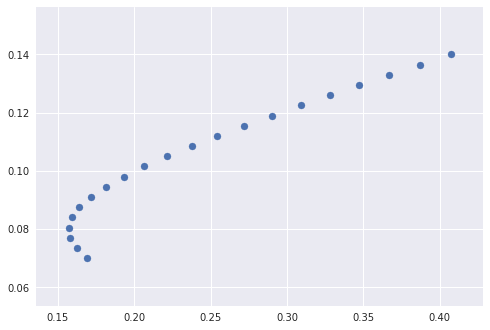

In [11]:
with plt.style.context('seaborn'):
    plt.scatter(df_effic['std'],df_effic['exp_ret'])